In [6]:
"""
Generate a realistic PIR dataset with proper motion patterns
Save this as 'generate_dataset.py' and run it on your PC
"""

import json
import random

def generate_normal_pattern():
    """Generate realistic normal motion pattern"""
    readings = [0] * 600
    num_motion_events = random.randint(5, 10)
    
    for _ in range(num_motion_events):
        start = random.randint(0, 550)
        duration = random.randint(8, 20)
        for i in range(start, min(start + duration, 600)):
            readings[i] = 1
    
    return readings

def generate_anomalous_pattern(pattern_type):
    """Generate anomalous motion patterns"""
    readings = [0] * 600
    
    if pattern_type == 'constant_motion':
        # Constant motion (suspicious lurking)
        readings = [1] * 600
    
    elif pattern_type == 'no_motion':
        # Complete stillness (abandoned area or system failure)
        readings = [0] * 600
    
    elif pattern_type == 'erratic':
        # Very erratic, rapid changes
        num_events = random.randint(25, 40)
        for _ in range(num_events):
            start = random.randint(0, 590)
            duration = random.randint(2, 5)
            for i in range(start, min(start + duration, 600)):
                readings[i] = 1
    
    elif pattern_type == 'long_stillness':
        # Unusually long period of no motion with brief movement
        motion_start = random.randint(500, 550)
        for i in range(motion_start, min(motion_start + 10, 600)):
            readings[i] = 1
    
    elif pattern_type == 'sustained':
        # Sustained continuous motion (50+ seconds)
        start = random.randint(0, 100)
        for i in range(start, min(start + 520, 600)):
            readings[i] = 1
    
    return readings

def extract_features(readings):
    """Extract features from PIR readings"""
    motion_count = sum(readings)
    
    # Motion durations
    motion_durations = []
    current_duration = 0
    for reading in readings:
        if reading == 1:
            current_duration += 1
        else:
            if current_duration > 0:
                motion_durations.append(current_duration)
            current_duration = 0
    if current_duration > 0:
        motion_durations.append(current_duration)
    
    motion_events = len(motion_durations)
    avg_duration = sum(motion_durations) / len(motion_durations) if motion_durations else 0
    max_duration = max(motion_durations) if motion_durations else 0
    
    # Stillness periods
    still_periods = []
    current_still = 0
    for reading in readings:
        if reading == 0:
            current_still += 1
        else:
            if current_still > 0:
                still_periods.append(current_still)
            current_still = 0
    if current_still > 0:
        still_periods.append(current_still)
    
    avg_still = sum(still_periods) / len(still_periods) if still_periods else 0
    max_still = max(still_periods) if still_periods else 0
    
    motion_ratio = motion_count / len(readings)
    
    # State changes
    changes = sum(1 for i in range(1, len(readings)) if readings[i] != readings[i-1])
    
    features = [
        motion_count,
        motion_events,
        round(avg_duration, 2),
        max_duration,
        round(avg_still, 2),
        max_still,
        round(motion_ratio, 4),
        changes
    ]
    
    return features

# Generate dataset
dataset = []

print("Generating realistic PIR dataset...")
print("=" * 60)

# Generate 10 normal patterns
print("\n🟢 Generating NORMAL patterns...")
for i in range(10):
    readings = generate_normal_pattern()
    features = extract_features(readings)
    dataset.append({
        "label": "normal",
        "features": features,
        "raw_readings": readings
    })
    print(f"   Normal pattern {i+1}/10: {features[:4]}")

# Generate 10 anomalous patterns (mix of different types)
print("\n🔴 Generating ANOMALOUS patterns...")
anomaly_types = ['constant_motion', 'no_motion', 'erratic', 'long_stillness', 'sustained']

for i in range(10):
    pattern_type = anomaly_types[i % len(anomaly_types)]
    readings = generate_anomalous_pattern(pattern_type)
    features = extract_features(readings)
    dataset.append({
        "label": "anomalous",
        "features": features,
        "raw_readings": readings
    })
    print(f"   Anomalous pattern {i+1}/10 ({pattern_type}): {features[:4]}")

# Save to file
output_file = 'pir_dataset.json'
with open(output_file, 'w') as f:
    json.dump(dataset, f, indent=2)

print("\n" + "=" * 60)
print(f"✅ Dataset saved to '{output_file}'")
print(f"📊 Total samples: {len(dataset)}")
print(f"   - Normal: 10")
print(f"   - Anomalous: 10")
print("\n🎯 Dataset Features:")
print("   1. Motion Count (0-600)")
print("   2. Motion Events (number of separate motions)")
print("   3. Avg Duration (average motion length)")
print("   4. Max Duration (longest motion)")
print("   5. Avg Stillness (average still period)")
print("   6. Max Stillness (longest still period)")
print("   7. Motion Ratio (0.0-1.0)")
print("   8. State Changes (transitions)")
print("\n✅ Ready for model training!")
print("=" * 60)

Generating realistic PIR dataset...

🟢 Generating NORMAL patterns...
   Normal pattern 1/10: [109, 6, 18.17, 29]
   Normal pattern 2/10: [110, 7, 15.71, 20]
   Normal pattern 3/10: [136, 7, 19.43, 38]
   Normal pattern 4/10: [128, 6, 21.33, 35]
   Normal pattern 5/10: [97, 8, 12.12, 19]
   Normal pattern 6/10: [118, 7, 16.86, 25]
   Normal pattern 7/10: [119, 7, 17.0, 34]
   Normal pattern 8/10: [69, 5, 13.8, 17]
   Normal pattern 9/10: [67, 4, 16.75, 28]
   Normal pattern 10/10: [88, 5, 17.6, 28]

🔴 Generating ANOMALOUS patterns...
   Anomalous pattern 1/10 (constant_motion): [600, 1, 600.0, 600]
   Anomalous pattern 2/10 (no_motion): [0, 0, 0, 0]
   Anomalous pattern 3/10 (erratic): [111, 28, 3.96, 7]
   Anomalous pattern 4/10 (long_stillness): [10, 1, 10.0, 10]
   Anomalous pattern 5/10 (sustained): [520, 1, 520.0, 520]
   Anomalous pattern 6/10 (constant_motion): [600, 1, 600.0, 600]
   Anomalous pattern 7/10 (no_motion): [0, 0, 0, 0]
   Anomalous pattern 8/10 (erratic): [122, 29, 

TensorFlow version: 2.20.0
Dataset shape: (20, 8)
Normal samples: 10, Anomalous samples: 10
Training samples: 8
Validation samples: 2

MODEL ARCHITECTURE


C:\Users\koust\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoding (Dense)                     │ (None, 4)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │              56 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 168 (672.00 B)

 Trainable params: 168 (672.00 B)

 Non-trainable params: 0 (0.00 B)


TRAINING
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.1194 - mae: 0.3068 - val_loss: 0.1507 - val_mae: 0.3595
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1178 - mae: 0.3050 - val_loss: 0.1493 - val_mae: 0.3577
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1163 - mae: 0.3030 - val_loss: 0.1478 - val_mae: 0.3559
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1149 - mae: 0.3012 - val_loss: 0.1464 - val_mae: 0.3541
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1133 - mae: 0.2992 - val_loss: 0.1450 - val_mae: 0.3522
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1118 - mae: 0.2972 - val_loss: 0.1436 - val_mae: 0.3503
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1103 - mae: 0.2953 - val_loss: 0.1421 - val_mae: 0.3484
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1088 - mae: 0.2931 - val_loss: 0.1405 - val_mae: 0.3464
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1

Reconstruction Error Threshold: 0.0658
Normal MSE - Mean: 0.0229, Max: 0.0978
Anomalous MSE - Mean: 2.1499, Min: 0.8035

Accuracy: 95.00%
Normal correctly classified: 9/10
Anomalous correctly classified: 10/10

✅ Model saved as 'pir_anomaly_model.h5'
✅ Scaler parameters saved
✅ Training plots saved as 'training_results.png'


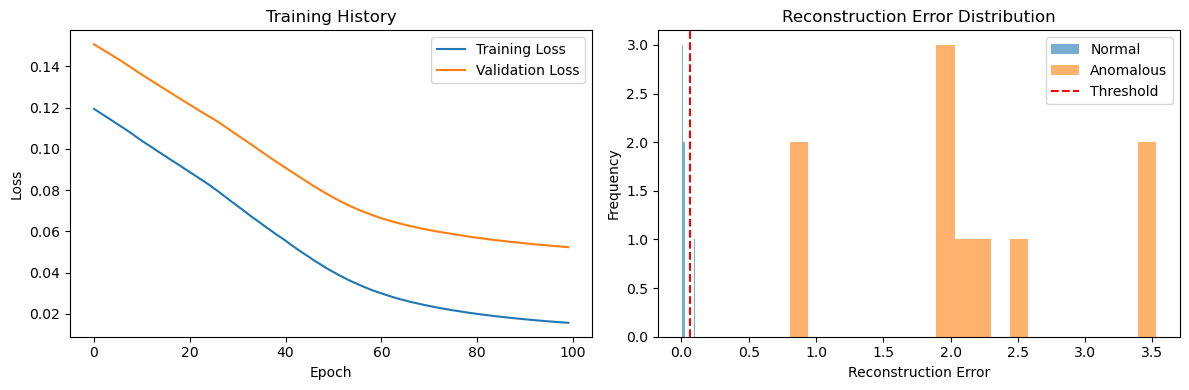


NEXT STEP: Convert model to TensorFlow Lite
Run: python convert_to_tflite.py


In [7]:
"""
PIR Anomaly Detection Model Training
Uses Autoencoder for anomaly detection
"""

import json
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

# Load dataset
with open('pir_dataset.json', 'r') as f:
    dataset = json.load(f)

# Extract features and labels
X = np.array([sample['features'] for sample in dataset])
y = np.array([1 if sample['label'] == 'normal' else 0 for sample in dataset])

print(f"Dataset shape: {X.shape}")
print(f"Normal samples: {sum(y)}, Anomalous samples: {len(y) - sum(y)}")

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset (use only normal data for training autoencoder)
X_normal = X_scaled[y == 1]
X_anomalous = X_scaled[y == 0]

X_train, X_val = train_test_split(X_normal, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")

# Build Autoencoder model
input_dim = X.shape[1]
encoding_dim = 4  # Compressed representation

model = keras.Sequential([
    # Encoder
    keras.layers.Dense(6, activation='relu', input_shape=(input_dim,)),
    keras.layers.Dense(encoding_dim, activation='relu', name='encoding'),
    
    # Decoder
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(input_dim, activation='linear')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print("\n" + "="*60)
print("MODEL ARCHITECTURE")
print("="*60)
model.summary()

# Train model
print("\n" + "="*60)
print("TRAINING")
print("="*60)

history = model.fit(
    X_train, X_train,
    epochs=100,
    batch_size=4,
    validation_data=(X_val, X_val),
    verbose=1,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)
    ]
)

# Evaluate
print("\n" + "="*60)
print("EVALUATION")
print("="*60)

# Calculate reconstruction error for normal and anomalous data
normal_predictions = model.predict(X_normal)
normal_mse = np.mean(np.power(X_normal - normal_predictions, 2), axis=1)

anomalous_predictions = model.predict(X_anomalous)
anomalous_mse = np.mean(np.power(X_anomalous - anomalous_predictions, 2), axis=1)

# Find threshold (95th percentile of normal reconstruction error)
threshold = np.percentile(normal_mse, 95)

print(f"Reconstruction Error Threshold: {threshold:.4f}")
print(f"Normal MSE - Mean: {normal_mse.mean():.4f}, Max: {normal_mse.max():.4f}")
print(f"Anomalous MSE - Mean: {anomalous_mse.mean():.4f}, Min: {anomalous_mse.min():.4f}")

# Classification accuracy
normal_correct = sum(normal_mse < threshold)
anomalous_correct = sum(anomalous_mse >= threshold)

accuracy = (normal_correct + anomalous_correct) / (len(normal_mse) + len(anomalous_mse))
print(f"\nAccuracy: {accuracy*100:.2f}%")
print(f"Normal correctly classified: {normal_correct}/{len(normal_mse)}")
print(f"Anomalous correctly classified: {anomalous_correct}/{len(anomalous_mse)}")

# Save model
model.save('pir_anomaly_model.h5')
print("\n✅ Model saved as 'pir_anomaly_model.h5'")

# Save scaler parameters
np.save('scaler_mean.npy', scaler.mean_)
np.save('scaler_scale.npy', scaler.scale_)
np.save('threshold.npy', np.array([threshold]))

print("✅ Scaler parameters saved")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training History')

plt.subplot(1, 2, 2)
plt.hist(normal_mse, bins=20, alpha=0.6, label='Normal')
plt.hist(anomalous_mse, bins=20, alpha=0.6, label='Anomalous')
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.title('Reconstruction Error Distribution')

plt.tight_layout()
plt.savefig('training_results.png', dpi=150)
print("✅ Training plots saved as 'training_results.png'")

plt.show()

print("\n" + "="*60)
print("NEXT STEP: Convert model to TensorFlow Lite")
print("="*60)
print("Run: python convert_to_tflite.py")

In [9]:
"""
Convert trained model to TensorFlow Lite (Fixed Version)
Handles Keras compatibility issues
"""

import tensorflow as tf
import numpy as np
import json
import os

print("=" * 60)
print("CONVERTING MODEL TO TENSORFLOW LITE (FIXED)")
print("=" * 60)

# Try to load model with different methods
model = None
model_loaded = False

# Method 1: Try loading .keras format (recommended)
if os.path.exists('pir_anomaly_model_fixed.keras'):
    print("\n📂 Loading from .keras format...")
    try:
        model = tf.keras.models.load_model('pir_anomaly_model_fixed.keras')
        model_loaded = True
        print("✅ Model loaded from .keras format")
    except Exception as e:
        print(f"❌ Failed: {e}")

# Method 2: Try loading .h5 without compilation
if not model_loaded and os.path.exists('pir_anomaly_model.h5'):
    print("\n📂 Loading from .h5 format (without compilation)...")
    try:
        model = tf.keras.models.load_model('pir_anomaly_model.h5', compile=False)
        model_loaded = True
        print("✅ Model loaded from .h5 format")
    except Exception as e:
        print(f"❌ Failed: {e}")

# Method 3: Rebuild model and load weights
if not model_loaded:
    print("\n🔧 Rebuilding model from architecture...")
    try:
        from tensorflow import keras
        
        input_dim = 8
        encoding_dim = 4
        
        model = keras.Sequential([
            keras.layers.Dense(6, activation='relu', input_shape=(input_dim,), name='encoder_layer1'),
            keras.layers.Dense(encoding_dim, activation='relu', name='encoding'),
            keras.layers.Dense(6, activation='relu', name='decoder_layer1'),
            keras.layers.Dense(input_dim, activation='linear', name='output')
        ], name='PIR_Autoencoder')
        
        # Try to load weights
        if os.path.exists('pir_anomaly_model.h5'):
            model.load_weights('pir_anomaly_model.h5')
            model_loaded = True
            print("✅ Model architecture rebuilt and weights loaded")
        else:
            print("❌ No model file found!")
            print("Please run the training script first.")
            exit(1)
            
    except Exception as e:
        print(f"❌ Failed to rebuild model: {e}")
        print("\nPlease run the training script again.")
        exit(1)

if not model_loaded:
    print("❌ Could not load model with any method!")
    exit(1)

# Create TFLite converter
print("\n🔧 Creating TFLite converter...")
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Apply optimizations
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Quantize to int8 for better performance on microcontrollers
print("🔬 Setting up quantization...")

def representative_dataset():
    """Provide representative data for quantization"""
    print("   Generating representative dataset...")
    
    # Load training data if available
    if os.path.exists('pir_dataset.json'):
        with open('pir_dataset.json', 'r') as f:
            dataset = json.load(f)
        
        X = np.array([sample['features'] for sample in dataset if sample['label'] == 'normal'])
        
        # Normalize using saved scaler parameters
        if os.path.exists('scaler_mean.npy') and os.path.exists('scaler_scale.npy'):
            scaler_mean = np.load('scaler_mean.npy')
            scaler_scale = np.load('scaler_scale.npy')
            X_scaled = (X - scaler_mean) / scaler_scale
        else:
            # Use simple normalization if scaler not available
            X_scaled = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-7)
    else:
        # Generate synthetic data if dataset not available
        print("   ⚠️  Dataset not found, using synthetic data...")
        X_scaled = np.random.randn(100, 8).astype(np.float32)
    
    # Yield data for quantization
    for i in range(min(100, len(X_scaled))):
        yield [X_scaled[i:i+1].astype(np.float32)]
    
    print("   ✅ Representative dataset generated")

converter.representative_dataset = representative_dataset

# Configure for int8 quantization
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.float32  # Keep input as float32
converter.inference_output_type = tf.float32

# Convert the model
print("\n⚙️  Converting model (this may take a minute)...")
try:
    tflite_model = converter.convert()
    print("✅ Model converted successfully!")
except Exception as e:
    print(f"❌ Conversion with quantization failed: {e}")
    print("Trying without full quantization...")
    
    # Fallback: convert without full quantization
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    tflite_model = converter.convert()
    print("✅ Model converted (without full quantization)")

# Save the TFLite model
print("\n💾 Saving TFLite model...")
with open('pir_anomaly_model.tflite', 'wb') as f:
    f.write(tflite_model)

model_size_kb = len(tflite_model) / 1024
print(f"✅ Model saved as 'pir_anomaly_model.tflite'")
print(f"   📦 Size: {len(tflite_model)} bytes ({model_size_kb:.2f} KB)")

# Test the TFLite model
print("\n🧪 Testing TFLite model...")
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("   Input Details:")
print(f"      Shape: {input_details[0]['shape']}")
print(f"      Type: {input_details[0]['dtype']}")

print("   Output Details:")
print(f"      Shape: {output_details[0]['shape']}")
print(f"      Type: {output_details[0]['dtype']}")

# Test inference
print("\n   Running test inference...")
test_input = np.random.randn(1, 8).astype(np.float32)
interpreter.set_tensor(input_details[0]['index'], test_input)
interpreter.invoke()
test_output = interpreter.get_tensor(output_details[0]['index'])
print(f"   ✅ Test inference successful")
print(f"      Input shape: {test_input.shape}")
print(f"      Output shape: {test_output.shape}")

# Create deployment package info
print("\n" + "=" * 60)
print("CREATING DEPLOYMENT PACKAGE")
print("=" * 60)

deployment_info = f"""
PIR ANOMALY DETECTION - DEPLOYMENT PACKAGE
{'=' * 60}

Model Information:
- Model Size: {len(tflite_model)} bytes ({model_size_kb:.2f} KB)
- Input Shape: {input_details[0]['shape']}
- Output Shape: {output_details[0]['shape']}

Files for Deployment:
1. pir_anomaly_model.tflite   - Main model file
2. scaler_mean.npy             - Feature normalization (mean)
3. scaler_scale.npy            - Feature normalization (scale)
4. threshold.npy               - Anomaly detection threshold

"""

if os.path.exists('scaler_mean.npy'):
    scaler_mean = np.load('scaler_mean.npy')
    scaler_scale = np.load('scaler_scale.npy')
    threshold = np.load('threshold.npy')[0]
    
    deployment_info += f"""Scaler Parameters:
Mean: {scaler_mean.tolist()}
Scale: {scaler_scale.tolist()}
Threshold: {threshold:.6f}

"""

deployment_info += """Deployment Steps:
1. Copy all required files to Raspberry Pi Pico W
2. Install micropython-tflite (if available)
3. Use the deployment script to run inference

Note: TFLite for MicroPython is still experimental.
For production, use the simplified inference approach
provided in the deployment script.
"""

with open('deployment_info.txt', 'w') as f:
    f.write(deployment_info)

print("✅ Deployment info saved as 'deployment_info.txt'")

print("\n" + "=" * 60)
print("✅ CONVERSION COMPLETE!")
print("=" * 60)

print("\n📦 Generated Files:")
print(f"   1. pir_anomaly_model.tflite  - TFLite model ({model_size_kb:.2f} KB)")
print("   2. deployment_info.txt        - Deployment instructions")

print("\n📋 Files to copy to Pico W:")
print("   • pir_anomaly_model.tflite")
if os.path.exists('scaler_mean.npy'):
    print("   • scaler_mean.npy")
    print("   • scaler_scale.npy")
    print("   • threshold.npy")
print("   • anomaly_detector.py (deployment script)")

print("\n🚀 NEXT STEP: Deploy to Raspberry Pi Pico W")
print("   Upload the deployment script and run it!")
print("=" * 60)

CONVERTING MODEL TO TENSORFLOW LITE (FIXED)

📂 Loading from .h5 format (without compilation)...
✅ Model loaded from .h5 format

🔧 Creating TFLite converter...
🔬 Setting up quantization...

⚙️  Converting model (this may take a minute)...
INFO:tensorflow:Assets written to: C:\Users\koust\AppData\Local\Temp\tmp8xvi6jq9\assets


INFO:tensorflow:Assets written to: C:\Users\koust\AppData\Local\Temp\tmp8xvi6jq9\assets


Saved artifact at 'C:\Users\koust\AppData\Local\Temp\tmp8xvi6jq9'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  2081088331536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2081088332496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2081088332112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2081088333072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2081088332880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2081088333456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2081088333264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2081088333840: TensorSpec(shape=(), dtype=tf.resource, name=None)


C:\Users\koust\anaconda3\Lib\site-packages\tensorflow\lite\python\convert.py:863: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


   Generating representative dataset...
   ✅ Representative dataset generated
✅ Model converted successfully!

💾 Saving TFLite model...
✅ Model saved as 'pir_anomaly_model.tflite'
   📦 Size: 3752 bytes (3.66 KB)

🧪 Testing TFLite model...
   Input Details:
      Shape: [1 8]
      Type: <class 'numpy.float32'>
   Output Details:
      Shape: [1 8]
      Type: <class 'numpy.float32'>

   Running test inference...
   ✅ Test inference successful
      Input shape: (1, 8)
      Output shape: (1, 8)

CREATING DEPLOYMENT PACKAGE
✅ Deployment info saved as 'deployment_info.txt'

✅ CONVERSION COMPLETE!

📦 Generated Files:
   1. pir_anomaly_model.tflite  - TFLite model (3.66 KB)
   2. deployment_info.txt        - Deployment instructions

📋 Files to copy to Pico W:
   • pir_anomaly_model.tflite
   • scaler_mean.npy
   • scaler_scale.npy
   • threshold.npy
   • anomaly_detector.py (deployment script)

🚀 NEXT STEP: Deploy to Raspberry Pi Pico W
   Upload the deployment script and run it!


C:\Users\koust\anaconda3\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
